In [454]:
import streamlit as st
import folium
import pandas as pd
import numpy as np
import os

In [455]:
df_weather = pd.read_csv("compiled_data.csv", compression='gzip')

/Users/aarondavis/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (17,26,27,29,30,35,36,38,40,41,43,44,49,50,56,57,69,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [456]:
df_gas = pd.read_csv("annual-co2-emissions-per-country.csv")

In [457]:
df_gas.head()

,Entity,Code,Year,Annual CO2 emissions
0,Afghanistan,AFG,1949,14656
1,Afghanistan,AFG,1950,84272
2,Afghanistan,AFG,1951,91600
3,Afghanistan,AFG,1952,91600
4,Afghanistan,AFG,1953,106256


In [458]:
df_weather.head()

,Unnamed: 0,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID_x,EVENT_ID,STATE,...,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH
0,0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [459]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968971 entries, 0 to 1968970
Data columns (total 72 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   BEGIN_YEARMONTH     int64  
 2   BEGIN_DAY           int64  
 3   BEGIN_TIME          int64  
 4   END_YEARMONTH       int64  
 5   END_DAY             int64  
 6   END_TIME            int64  
 7   EPISODE_ID_x        float64
 8   EVENT_ID            int64  
 9   STATE               object 
 10  STATE_FIPS          float64
 11  YEAR                int64  
 12  MONTH_NAME          object 
 13  EVENT_TYPE          object 
 14  CZ_TYPE             object 
 15  CZ_FIPS             int64  
 16  CZ_NAME             object 
 17  WFO                 object 
 18  BEGIN_DATE_TIME     object 
 19  CZ_TIMEZONE         object 
 20  END_DATE_TIME       object 
 21  INJURIES_DIRECT     int64  
 22  INJURIES_INDIRECT   int64  
 23  DEATHS_DIRECT       int64  
 24  DEATHS_INDIRECT     int6

In [460]:
# df_weather.drop(columns = ["FATALITY_LOCATION", "BEGIN_AZIMUTH", "BEGIN_LOCATION", 
#                            "CATEGORY", "EVENT_YEARMONTH", "FATALITY_AGE", "FATALITY_DATE", 
#                            "FATALITY_ID", "FATALITY_SEX", "FATALITY_TYPE", "FAT_DAY", 
#                            "FAT_TIME", "FAT_YEARMONTH", "END_AZIMUTH", "END_LOCATION", 
#                            "EPISODE_ID", "EPISODE_NARRATIVE", "EVENT_NARRATIVE", 
#                            "FLOOD_CAUSE", "MAGNITUDE_TYPE", "SOURCE", "TOR_OTHER_CZ_FIPS", 
#                            "TOR_OTHER_CZ_NAME", "TOR_OTHER_CZ_STATE", 
#                            "TOR_OTHER_WFO", "WFO", "END_LAT", "END_LON", "TOR_F_SCALE", 
#                            "MONTH_NAME"], inplace = True)

In [461]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968971 entries, 0 to 1968970
Data columns (total 72 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   BEGIN_YEARMONTH     int64  
 2   BEGIN_DAY           int64  
 3   BEGIN_TIME          int64  
 4   END_YEARMONTH       int64  
 5   END_DAY             int64  
 6   END_TIME            int64  
 7   EPISODE_ID_x        float64
 8   EVENT_ID            int64  
 9   STATE               object 
 10  STATE_FIPS          float64
 11  YEAR                int64  
 12  MONTH_NAME          object 
 13  EVENT_TYPE          object 
 14  CZ_TYPE             object 
 15  CZ_FIPS             int64  
 16  CZ_NAME             object 
 17  WFO                 object 
 18  BEGIN_DATE_TIME     object 
 19  CZ_TIMEZONE         object 
 20  END_DATE_TIME       object 
 21  INJURIES_DIRECT     int64  
 22  INJURIES_INDIRECT   int64  
 23  DEATHS_DIRECT       int64  
 24  DEATHS_INDIRECT     int6

In [462]:
df_weather.head()

,Unnamed: 0,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID_x,EVENT_ID,STATE,...,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH
0,0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='Frequency'>

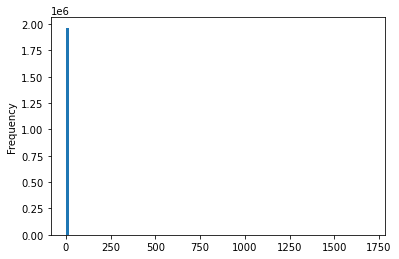

In [463]:
df_weather["INJURIES_DIRECT"].plot.hist(bins = 100)

In [464]:

df_weather.rename(columns = {"BEGIN_LAT": "latitude", "BEGIN_LON": "longitude"}, inplace = True)

In [465]:
df_weather.head()

,Unnamed: 0,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID_x,EVENT_ID,STATE,...,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH
0,0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [466]:


# df_weather["BEGIN_DATE_TIME"] = df_weather["BEGIN_DATE_TIME"].replace('', np.nan)

# df_weather["BEGIN_DATE_TIME"] = df_weather["BEGIN_DATE_TIME"].apply(lambda x: x[:-12])

# df_weather["BEGIN_DATE_TIME"] = pd.to_datetime(df_weather["BEGIN_DATE_TIME"], 
#                                                format = "%d-%b")

In [467]:
df_weather["BEGIN_YEARMONTH"] = pd.to_datetime(df_weather["BEGIN_YEARMONTH"], format = "%Y%m")

In [468]:
df_weather[df_weather["BEGIN_DATE_TIME"]=='']

,Unnamed: 0,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID_x,EVENT_ID,STATE,...,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH


In [469]:
df_weather["MONTH"] = pd.DatetimeIndex(df_weather["BEGIN_YEARMONTH"]).month
df_weather["DAY"] = df_weather["BEGIN_DAY"]
df_weather["YEAR"] = pd.DatetimeIndex(pd.to_datetime(df_weather["BEGIN_YEARMONTH"], format = "%Y")).year

In [470]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968971 entries, 0 to 1968970
Data columns (total 74 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Unnamed: 0          int64         
 1   BEGIN_YEARMONTH     datetime64[ns]
 2   BEGIN_DAY           int64         
 3   BEGIN_TIME          int64         
 4   END_YEARMONTH       int64         
 5   END_DAY             int64         
 6   END_TIME            int64         
 7   EPISODE_ID_x        float64       
 8   EVENT_ID            int64         
 9   STATE               object        
 10  STATE_FIPS          float64       
 11  YEAR                int64         
 12  MONTH_NAME          object        
 13  EVENT_TYPE          object        
 14  CZ_TYPE             object        
 15  CZ_FIPS             int64         
 16  CZ_NAME             object        
 17  WFO                 object        
 18  BEGIN_DATE_TIME     object        
 19  CZ_TIMEZONE         object        
 20  EN

In [471]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23403 entries, 0 to 23402
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Entity                23403 non-null  object
 1   Code                  20766 non-null  object
 2   Year                  23403 non-null  int64 
 3   Annual CO2 emissions  23403 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 731.5+ KB


In [472]:
# st.write(df_weather)

In [473]:
#st.map(df_weather)
df_weather.dropna(subset=["longitude", "latitude"], inplace=True)

In [ ]:
#http://stackoverflow.com/questions/33575053/ddg#43713738

#create a map
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.latitude, point.longitude],
                        radius=2,
                        weight=5).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
df_weather.apply(plotDot, axis = 1)


#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

this_map

In [ ]:
df_global_gas = df_gas.groupby("Year").sum("Annual CO2 emissions")

In [ ]:
df_global_gas["Year"] = df_global_gas.index

df_global_gas.plot.scatter(x="Year", y="Annual CO2 emissions")

In [ ]:
df_global_gas.index

In [ ]:
df_weather_by_year = df_weather.groupby("YEAR").count()

In [ ]:
df_weather_by_year.head()

In [ ]:
df_weather_by_year["Year"] = df_weather_by_year.index

In [ ]:
df_weather_by_year.plot.scatter(x="Year", y=0)